In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
upload_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/upload_eval.csv'
upload = pd.read_csv(upload_csv_path)
upload['remain_upload_time'] = upload['upload_time'] - upload['obfuscation_time'] - upload['generate_fake_rows_time']-upload["db_query_time"]-upload["db_write_time"]
print(upload)
upload_bar = upload[['generate_fake_rows_time','obfuscation_time','db_query_time','db_write_time','remain_upload_time','fake_data_rows']]
upload_bar = upload_bar.sort_values(by=['fake_data_rows'])

     data_per_true  real_data_rows  fake_data_rows  generate_fake_rows_time  \
0               10           10000           90000                 5.498273   
1               10              10              90                 0.009430   
2               10          100000          900000                53.310956   
3               10               1               9                 0.003015   
4               10             100             900                 0.075487   
..             ...             ...             ...                      ...   
105             20            1000           19000                 1.127110   
106             20           10000          190000                10.782041   
107             20              10             190                 0.017158   
108             30           10000          290000                16.734524   
109             30              10             290                 0.022849   

     obfuscation_time  numbers_of_real_data_in_db_b

<Axes: ylabel='fake_data_rows'>

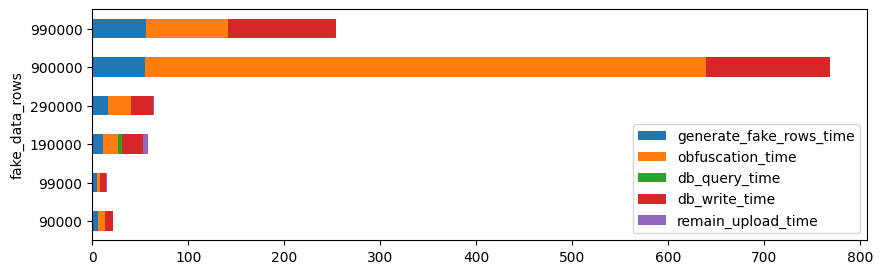

In [19]:
bigger_part = upload_bar.loc[upload_bar['fake_data_rows'] >= 90000]
bigger_part = bigger_part.groupby('fake_data_rows').mean()
bigger_part.plot.barh(stacked=True,figsize=(10,3))

<Axes: ylabel='fake_data_rows'>

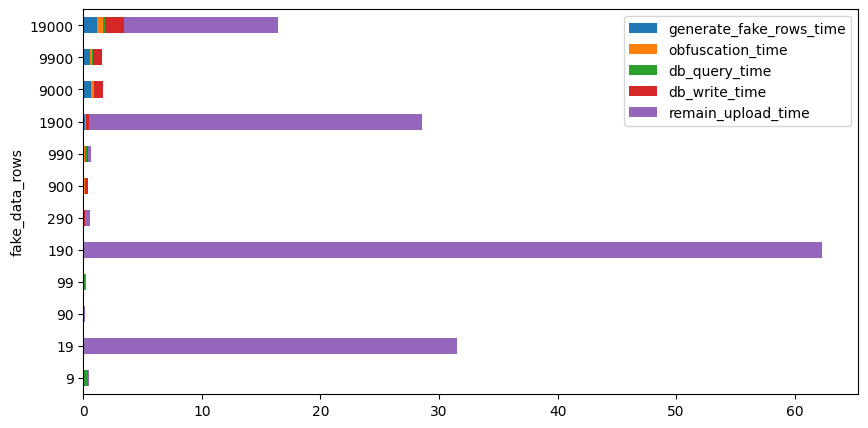

In [20]:
smaller_part = upload_bar.loc[upload_bar['fake_data_rows'] < 90000]
smaller_part = smaller_part.groupby('fake_data_rows').mean()
smaller_part.plot.barh(stacked=True,figsize=(10,5))

/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


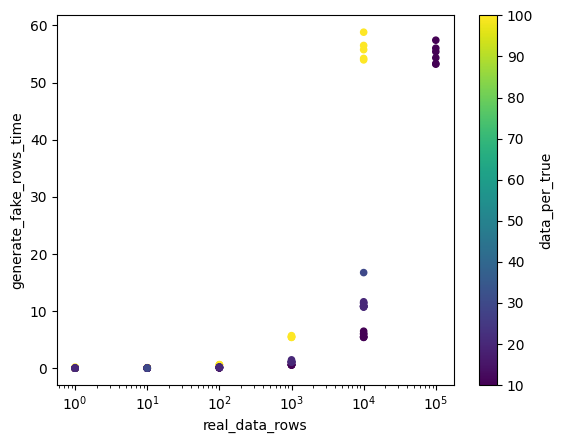

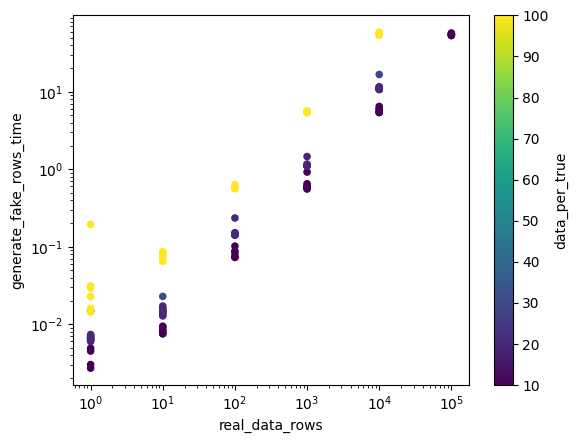

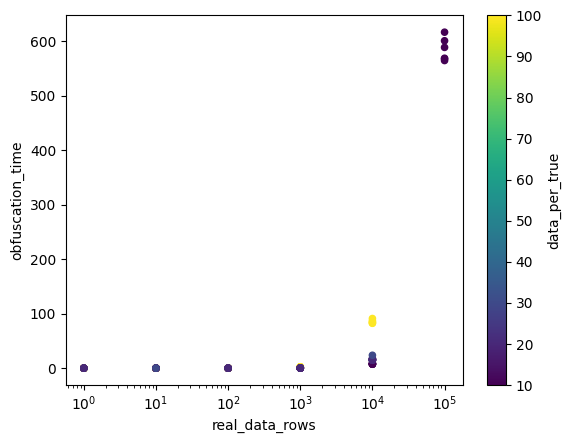

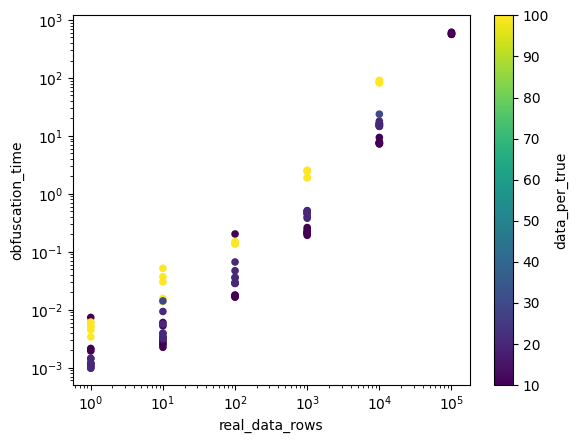

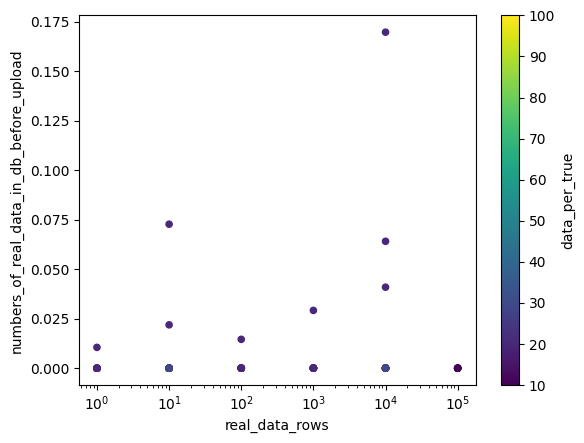

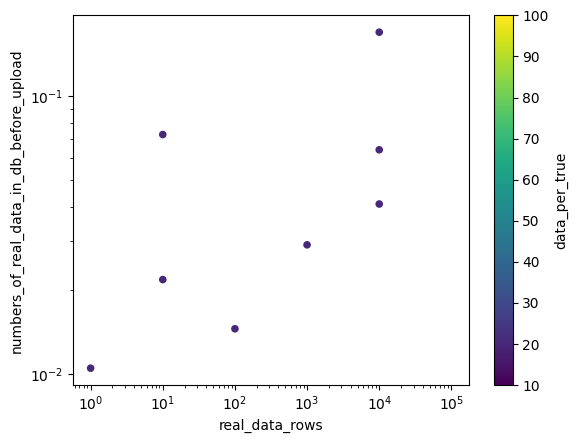

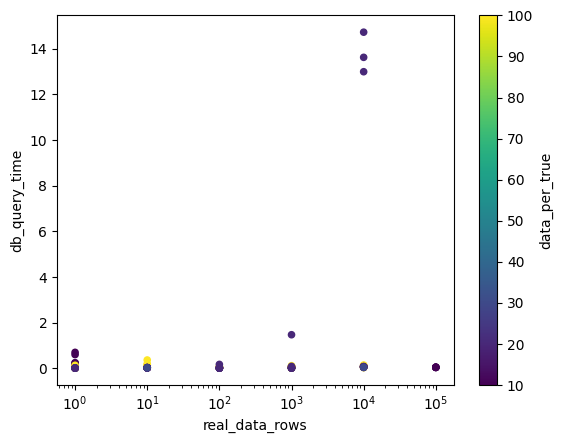

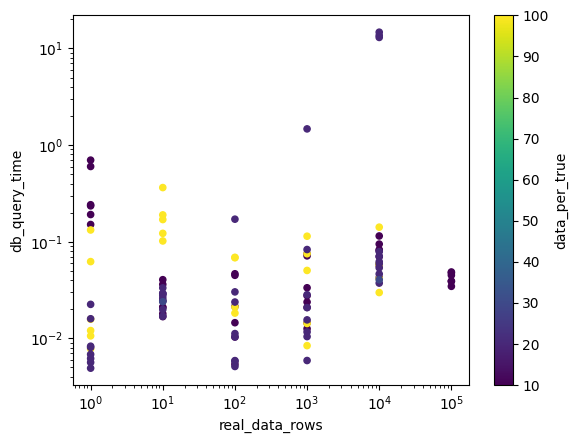

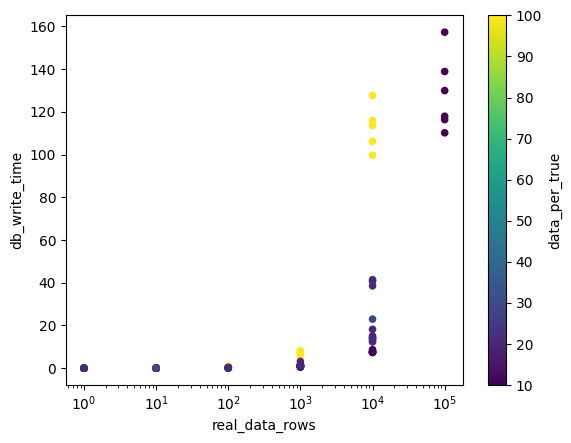

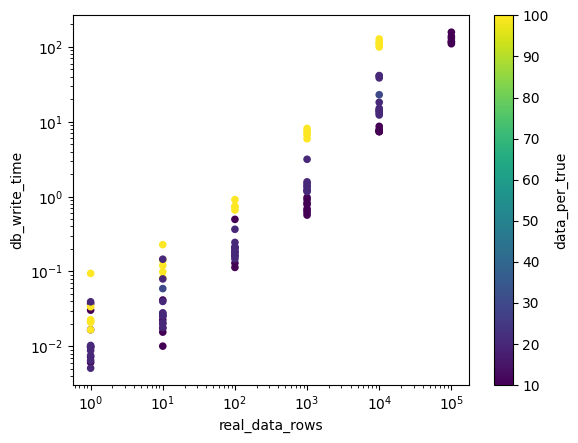

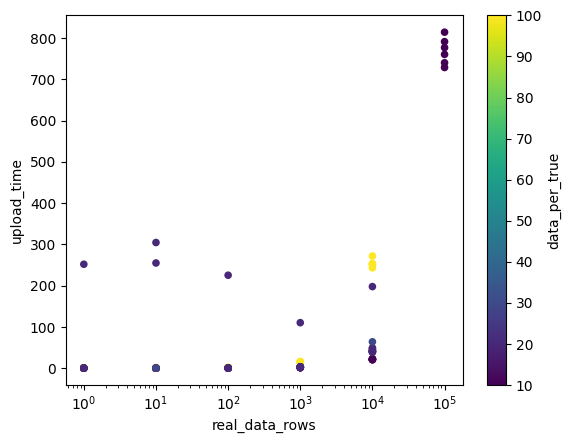

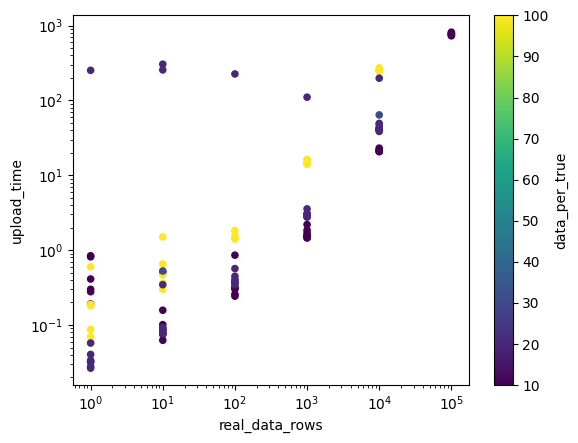

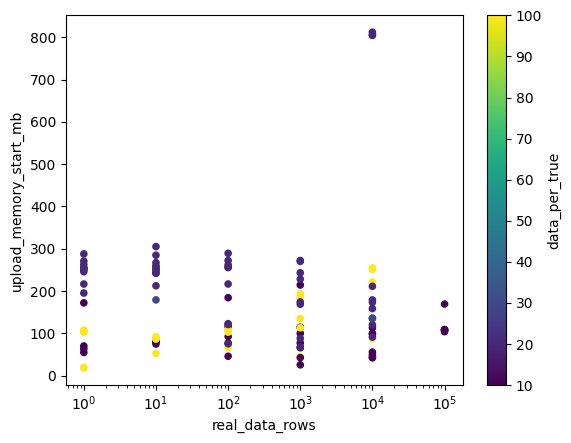

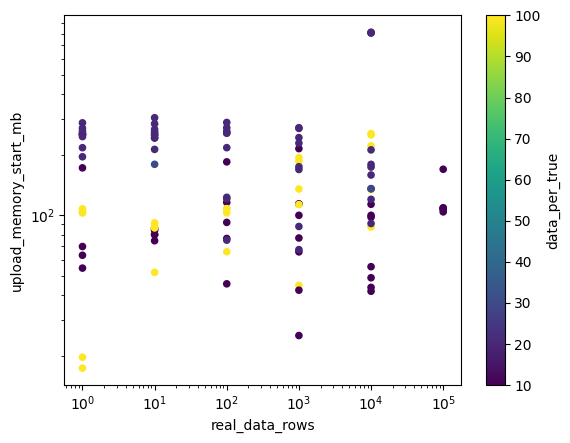

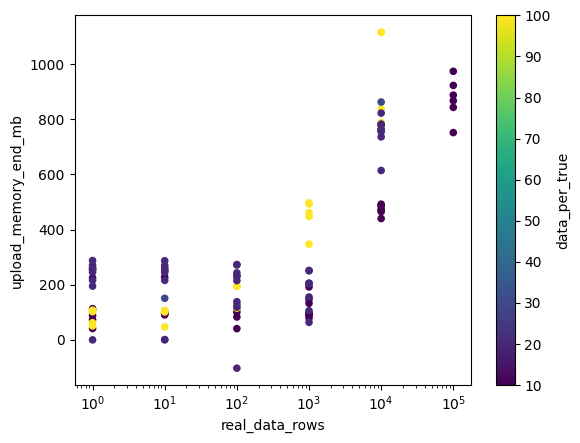

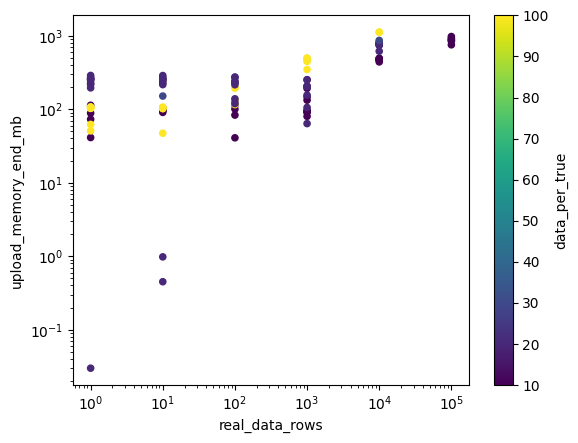

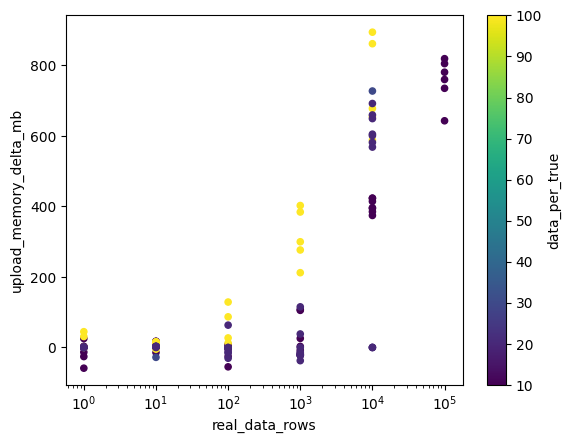

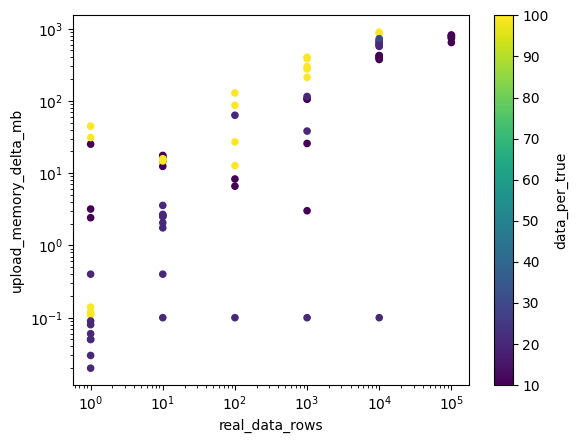

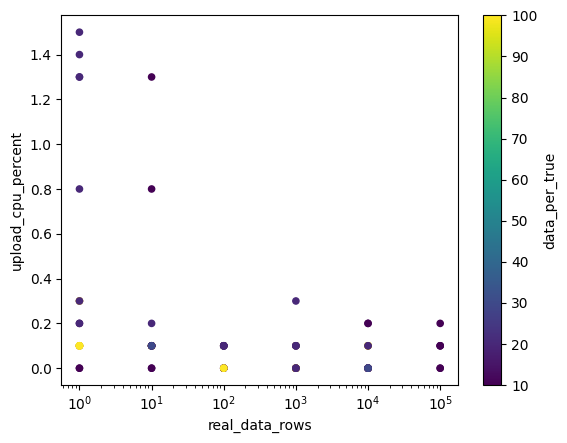

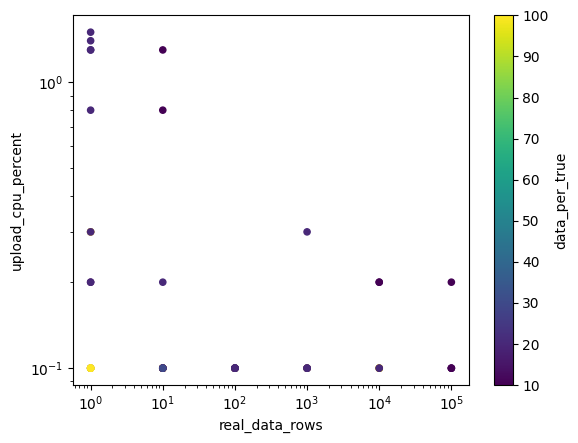

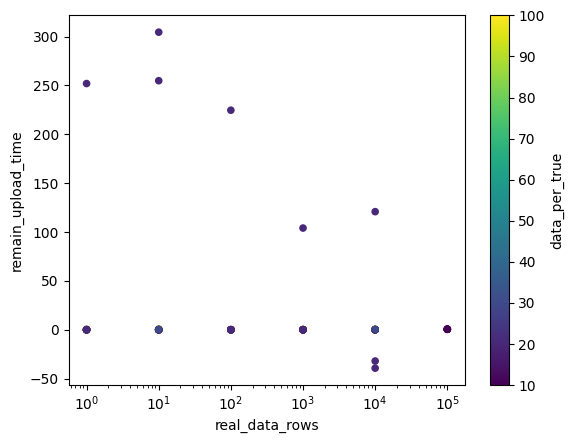

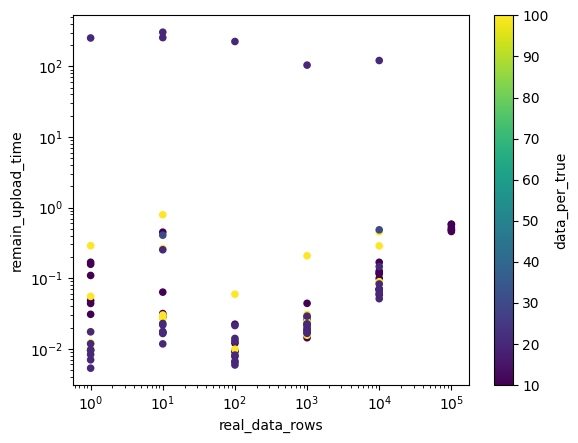

In [21]:
unused_col = ['data_per_true', 'real_data_rows', 'fake_data_rows',"numbers_of_real_data_in_db_before_read"]
for i, col in enumerate(upload.columns):
    if col in unused_col:
        continue
    ax = upload.plot.scatter(x='real_data_rows', y=col,c='data_per_true',colormap='viridis')
    ax.set_xscale('log')
    ax1 = upload.plot.scatter(x='real_data_rows', y=col,c='data_per_true',colormap='viridis')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
  
    



In [22]:
read_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/read_eval.csv'
read = pd.read_csv(read_csv_path)
read["remain_read_time"] = read["read_real_data_time"] - read["deobfuscation_time"] - read["db_query_time"]
print(read)
read_bar = read[['deobfuscation_time','db_query_time','remain_read_time','total_read_rows']]
read_bar = read_bar.sort_values(by=['total_read_rows'])

     read_real_data_time  db_query_time  deobfuscation_time  \
0               0.213028       0.149154            0.043306   
1               0.013672       0.003664            0.000078   
2               2.538697       2.031931            0.370525   
3               0.035132       0.006837            0.000069   
4               0.028309       0.006107            0.001394   
..                   ...            ...                 ...   
130             0.039707       0.030553            0.000172   
131             0.013235       0.003051            0.000000   
132             0.329379       0.121659            0.038081   
133             0.043379       0.026544            0.000212   
134             0.024445       0.002707            0.000000   

     numbers_of_real_data_in_db_before_read  total_read_rows  data_per_true  \
0                                         0            10000           10.0   
1                                         0               10           10.0   
2     

<Axes: ylabel='total_read_rows'>

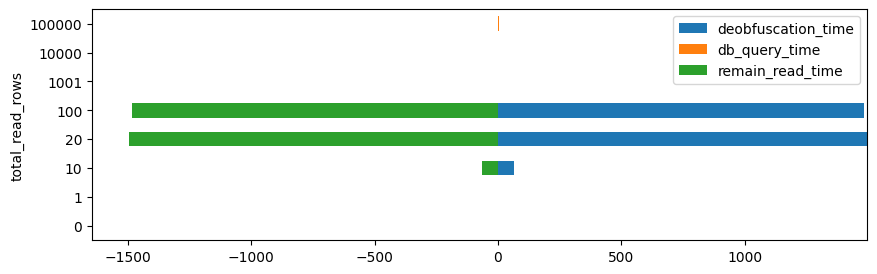

In [23]:
read_bar = read_bar.groupby('total_read_rows').mean()
read_bar.plot.barh(stacked=True,figsize=(10,3))

/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


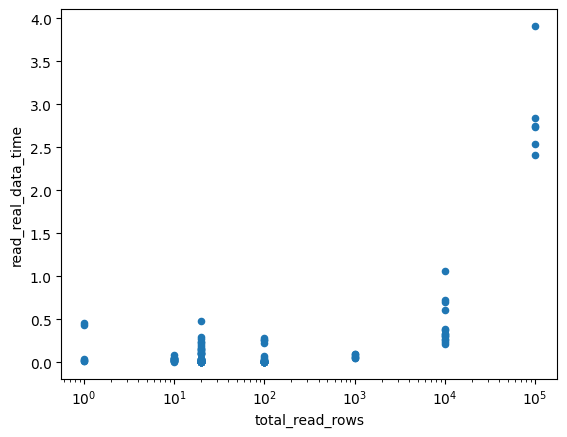

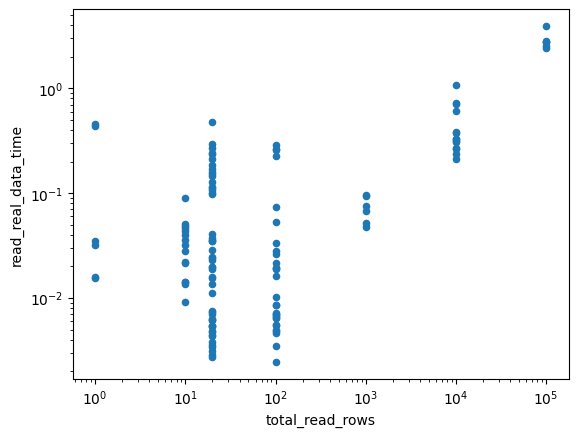

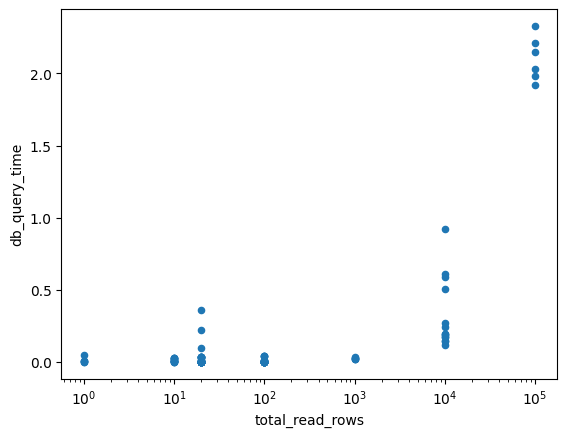

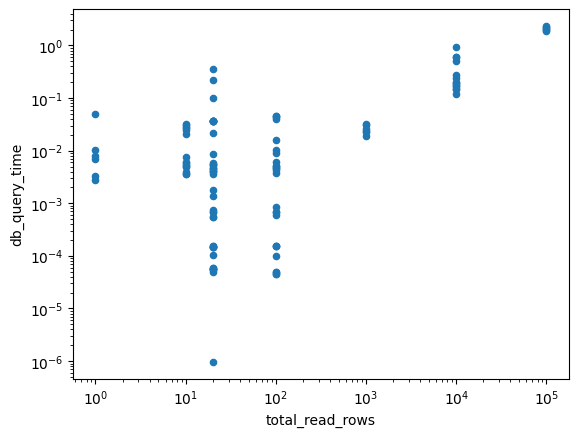

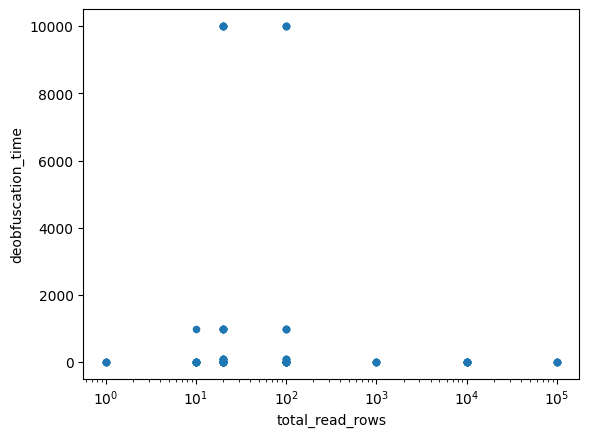

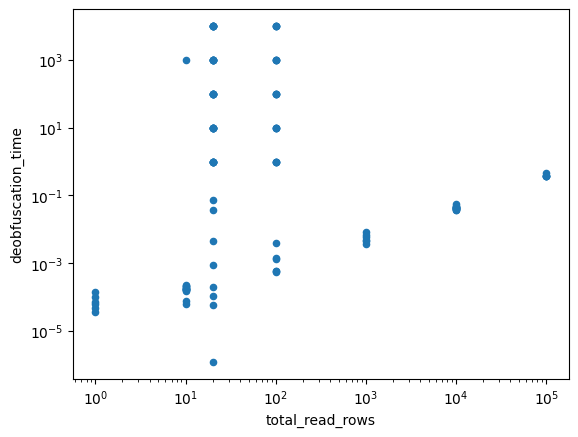

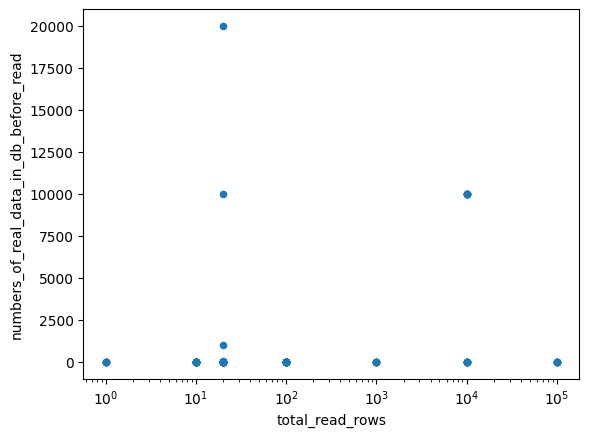

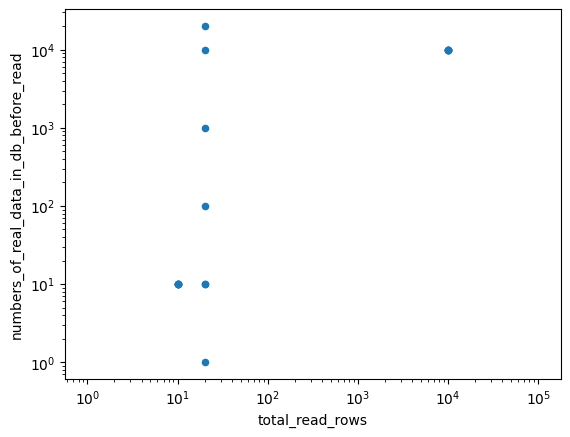

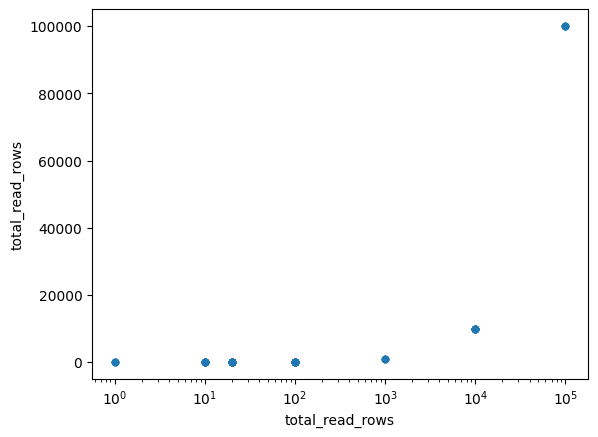

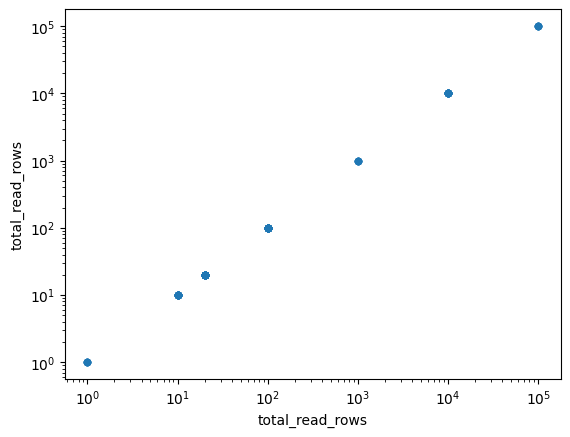

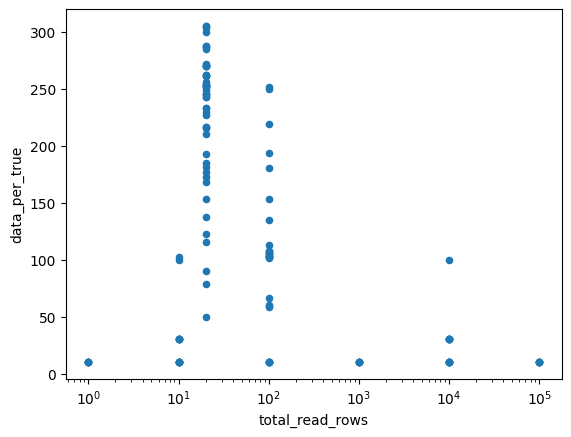

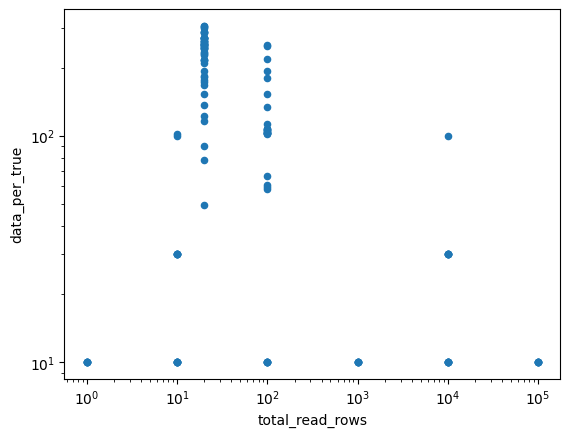

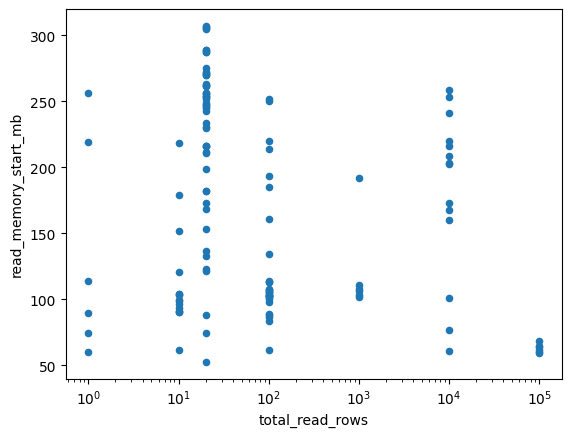

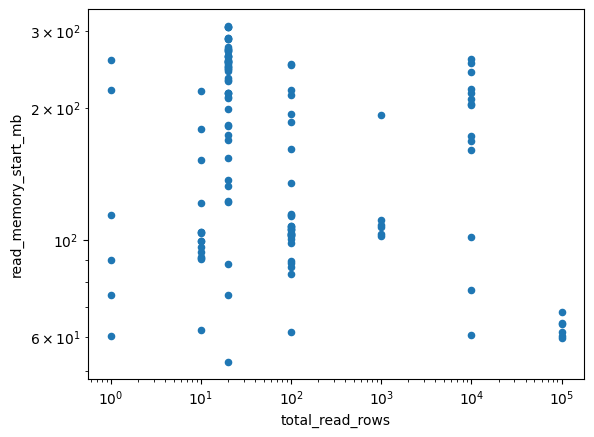

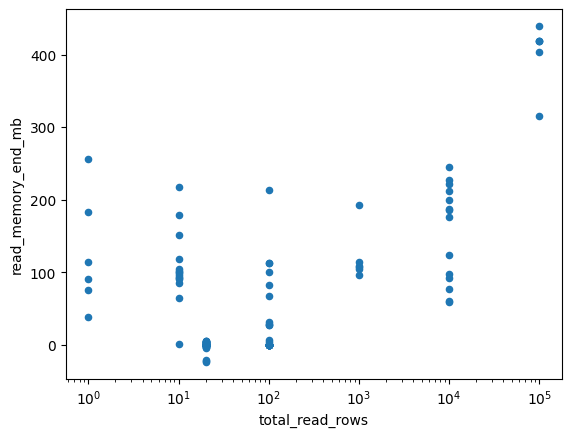

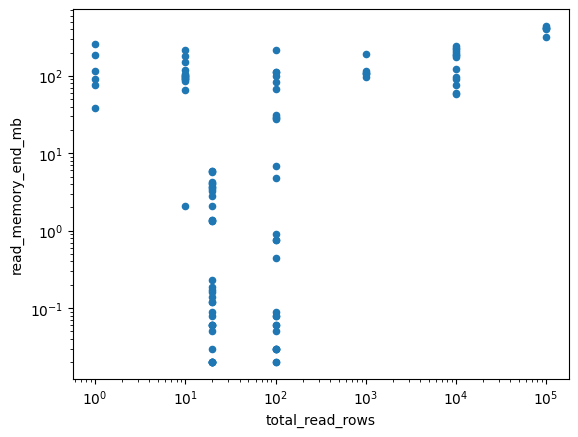

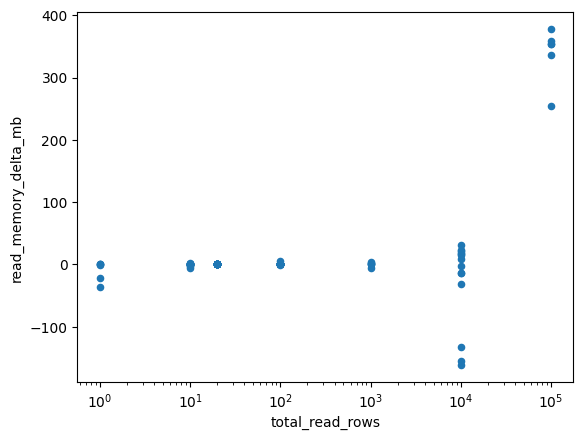

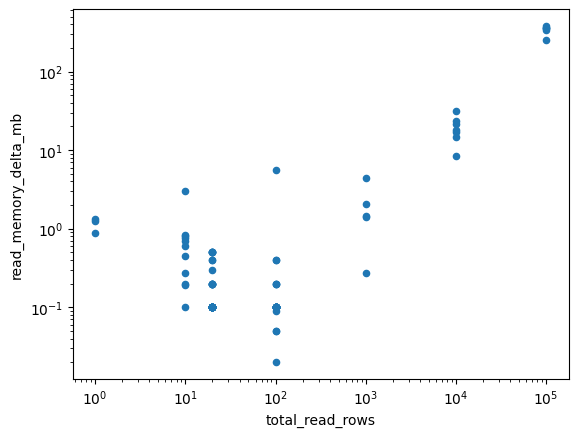

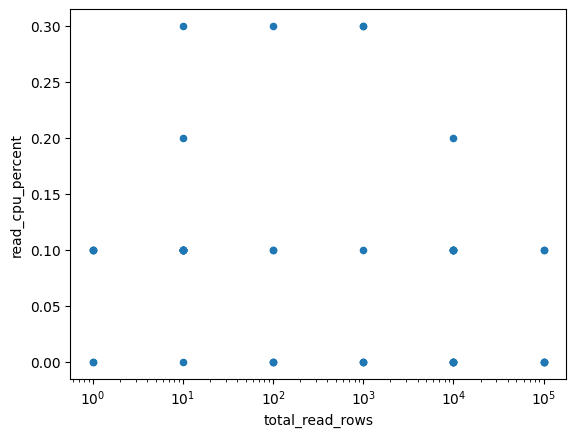

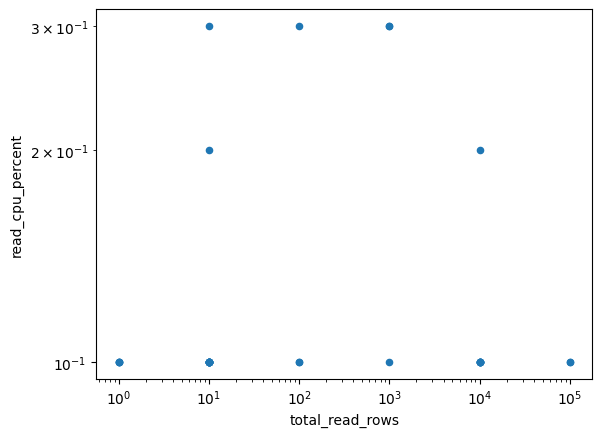

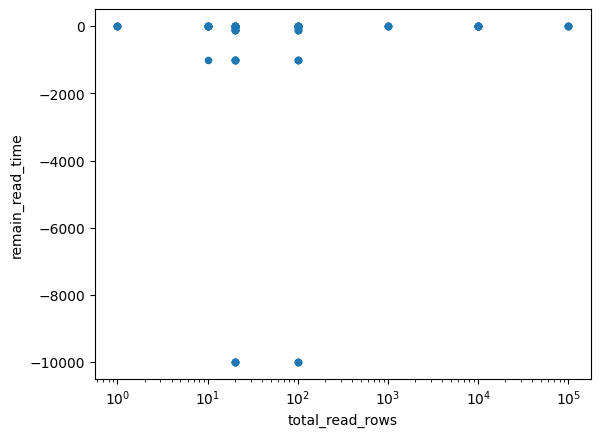

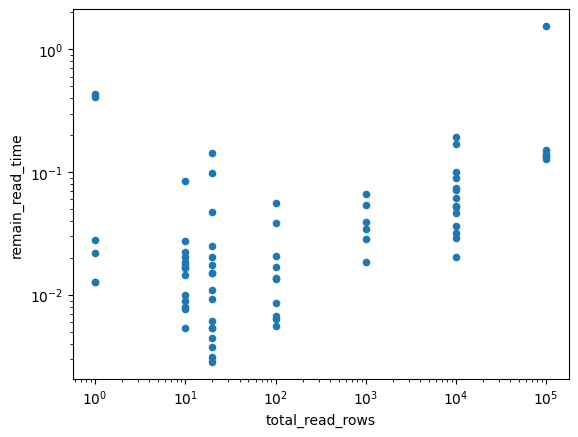

In [24]:
for i, col in enumerate(read.columns):
    ax = read.plot.scatter(x='total_read_rows', y=col,)
    ax.set_xscale('log')
    ax1 = read.plot.scatter(x='total_read_rows', y=col,)
    ax1.set_xscale('log')
    ax1.set_yscale('log')